#### Title: Exploratory Data Analysis and Classification Models on MNIST Dataset
#### Date: [3/5/2024]
#### Description: This Jupyter Notebook explores the MNIST dataset, performs exploratory data analysis (EDA), and builds two classification models: K-Nearest Neighbors (KNN) and Random Forest Classifier (RFC), after applying Data-Augmentation methods.
#### Dataset: The MNIST dataset is a collection of 28x28 grayscale images of handwritten digits (0-9). It contains 60,000 training images and 10,000 testing images.
#### References:
#### 1. MNIST Dataset: https://www.kaggle.com/datasets/oddrationale/mnist-in-csv
#### 2. Hands-On Machine Learning with Scikit-Learn, Keras, and Tensorflow 

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [11]:
train = pd.read_csv("mnist_train.csv")
test_ = pd.read_csv("mnist_test.csv")


In [12]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
train.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [14]:
labels = train["label"].values
digits = train.drop("label", axis=1).values


In [15]:
zeros = digits[labels == 0]
ones = digits[labels == 1]
fives = digits[labels == 5]

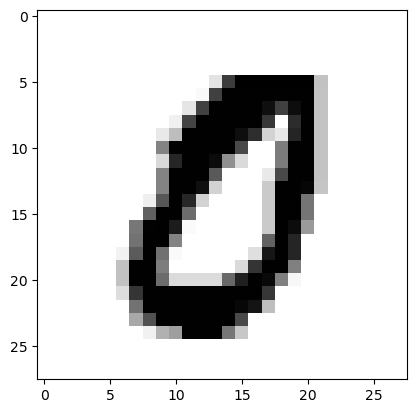

In [16]:
plt.imshow(zeros[10].reshape(28, 28), cmap=mpl.cm.binary)


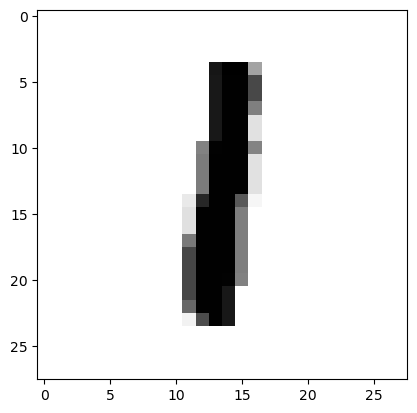

In [17]:
plt.imshow(ones[222].reshape(28, 28), cmap=mpl.cm.binary)


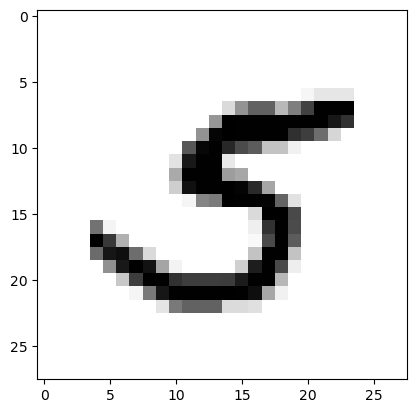

In [18]:
plt.imshow(fives[15].reshape(28, 28), cmap=mpl.cm.binary)


In [19]:
from sklearn.preprocessing import MinMaxScaler

MM = MinMaxScaler()
digits_scaled = MM.fit_transform(digits)
## basically divides them by 255
# simpler way is to do it like this:
# digits_scaled = digits/255

In [20]:
digits_test = MM.fit_transform(test_.drop("label", axis=1).values)
## also divied them by 255

## the following blocks of code are to apply data augmentation on the training set, to increase the training examples as suggested in "Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow" book, Chapter 3 Exercise 2

In [34]:
from enum import Enum
class Directions(Enum):
    RIGHT = 1   
    BOTTOM = 2
    LEFT = 3
    TOP = 4

def shift_by_1px(np_image: np.ndarray, dir):
    shifted_image = np_image.copy().reshape(28,28)
    if dir == Directions.LEFT:        
        shifted_image = np.roll(shifted_image, -1, 1)
    elif dir == Directions.BOTTOM:
        shifted_image = np.roll(shifted_image,1, 0)
    elif dir == Directions.RIGHT:
        shifted_image = np.roll(shifted_image, 1, 1)
    elif dir == Directions.TOP:
        shifted_image = np.roll(shifted_image,-1, 0)
    return shifted_image.reshape(784)

In [35]:
BIG_X_LIST = [image for image in digits_scaled]
BIG_y_LIST = [label for label in labels]


for digit, label in zip(digits, labels):
    L = shift_by_1px(digit, Directions.LEFT)
    R = shift_by_1px(digit, Directions.RIGHT)
    T = shift_by_1px(digit, Directions.TOP)
    B = shift_by_1px(digit, Directions.BOTTOM)
    BIG_X_LIST.extend([L, R, T, B])
    BIG_y_LIST.extend([label, label, label, label])

new_X_train = np.array(BIG_X_LIST)
new_y_train = np.array(BIG_y_LIST)

In [36]:
labeled_X = list(zip(new_X_train, new_y_train))
from random import shuffle
shuffle(labeled_X)
new_X_train, new_y_train = zip(*labeled_X)
new_X_train = np.array(new_X_train)
new_y_train = np.array(new_y_train)


In [39]:
KNN = KNeighborsClassifier(n_neighbors=3)   # 3 was chosen after applying grid search
KNN.fit(X= new_X_train, y= new_y_train)
preds = KNN.predict(digits_test)

In [40]:
new_X_train[0].shape

(784,)

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
cf = confusion_matrix(test_["label"].values, preds)

In [42]:
cf

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  10,    9,  996,    2,    0,    0,    0,   13,    2,    0],
       [   0,    2,    4,  976,    1,   13,    1,    7,    3,    3],
       [   1,    6,    0,    0,  950,    0,    4,    2,    0,   19],
       [   6,    1,    0,   11,    2,  859,    5,    1,    3,    4],
       [   5,    3,    0,    0,    3,    3,  944,    0,    0,    0],
       [   0,   21,    5,    0,    1,    0,    0,  991,    0,   10],
       [   8,    2,    4,   16,    8,   11,    3,    4,  914,    4],
       [   4,    5,    2,    8,    9,    2,    1,    8,    2,  968]],
      dtype=int64)

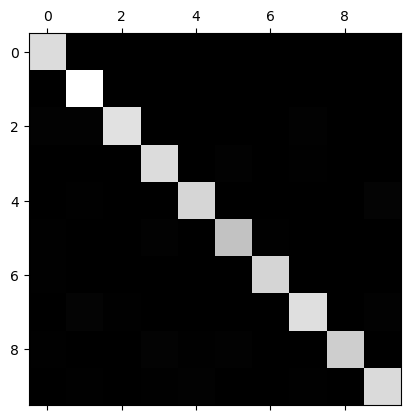

In [43]:
plt.matshow(cf, cmap=plt.cm.gray)

## almost a perfect classifier

In [44]:
as_ = accuracy_score(test_["label"].values, preds)
as_

0.9705

In [45]:
ps_ = precision_score(test_["label"].values, preds, average='weighted')
ps_

0.9706882342922246

In [46]:
rs_ = recall_score(test_["label"].values, preds, average='weighted')
rs_

0.9705

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
RFC = RandomForestClassifier()
RFC.fit(new_X_train, new_y_train)
predsRFC = RFC.predict(digits_test)


In [49]:
cf = confusion_matrix(test_["label"].values, predsRFC)


In [50]:
cf

array([[ 971,    0,    0,    0,    0,    3,    3,    1,    2,    0],
       [   0, 1123,    3,    1,    1,    1,    3,    0,    3,    0],
       [   5,    0, 1003,    4,    3,    0,    3,    8,    6,    0],
       [   0,    0,    7,  980,    0,    4,    0,    8,    9,    2],
       [   1,    0,    1,    0,  960,    0,    5,    0,    3,   12],
       [   2,    0,    0,   14,    2,  864,    5,    2,    2,    1],
       [   7,    3,    1,    0,    4,    3,  937,    0,    3,    0],
       [   1,    1,   15,    0,    1,    0,    0, 1000,    4,    6],
       [   4,    0,    3,    8,    6,    6,    1,    4,  934,    8],
       [   3,    5,    2,   12,    9,    3,    1,    5,    4,  965]],
      dtype=int64)

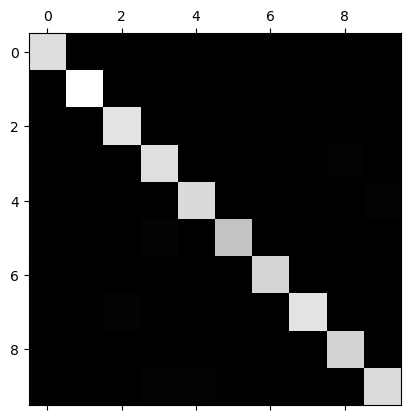

In [51]:
plt.matshow(cf, cmap=plt.cm.gray)


In [52]:
as_ = accuracy_score(test_["label"].values, predsRFC)
as_

0.9737

In [53]:
from sklearn.metrics import recall_score, precision_score
rs_ = recall_score(test_["label"].values, predsRFC, average='macro')
ps_ = precision_score(test_["label"].values, predsRFC, average='macro')

In [54]:
rs_

0.9734813184469013

In [55]:
ps_

0.9735279868829926

# The dataset is too large. Applying grid search on Random Forest would take a lifetime to complete, so there's no need; the current scores are good.

In [56]:
import pickle


pickle.dump(RFC, open("model2.pkl", "wb"))